In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


from warnings import filterwarnings
filterwarnings('ignore')


In [4]:
data=pd.read_csv('/Users/xuyuansmacbook/Desktop/Life Expectancy Data.csv')
data

,Country,Year,Status,Life expectancy,Adult Mortality(Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)),infant deaths(Number of Infant Deaths per 1000 population),"Alcohol(Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol))",percentage expenditure(Expenditure on health as a percentage of Gross Domestic Product per capita(%)),Hepatitis B(Hepatitis B (HepB) immunization coverage among 1-year-olds (%)),Measles(Measles - number of reported cases per 1000 population),...,Polio(Polio (Pol3) immunization coverage among 1-year-olds (%)),Total expenditure(General government expenditure on health as a percentage of total government expenditure (%)),Diphtheria(Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)),HIV/AIDS(Deaths per 1 000 live births HIV/AIDS (0-4 years)),GDP,Population,thinness 1-19 years(Prevalence of thinness among children and adolescents for Age 10 to 19 (% )),thinness 5-9 years(Prevalence of thinness among children for Age 5 to 9(%)),Income composition of resources(Human Development Index in terms of income composition of resources (index ranging from 0 to 1)),Schooling(Number of years of Schooling(years))
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
#developing 换成0，developed换成1，方便后面处理
data['Status']=data['Status'].apply(lambda x:0 if x=='Developing' else 1)

data

,Country,Year,Status,Life expectancy,Adult Mortality(Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)),infant deaths(Number of Infant Deaths per 1000 population),"Alcohol(Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol))",percentage expenditure(Expenditure on health as a percentage of Gross Domestic Product per capita(%)),Hepatitis B(Hepatitis B (HepB) immunization coverage among 1-year-olds (%)),Measles(Measles - number of reported cases per 1000 population),...,Polio(Polio (Pol3) immunization coverage among 1-year-olds (%)),Total expenditure(General government expenditure on health as a percentage of total government expenditure (%)),Diphtheria(Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)),HIV/AIDS(Deaths per 1 000 live births HIV/AIDS (0-4 years)),GDP,Population,thinness 1-19 years(Prevalence of thinness among children and adolescents for Age 10 to 19 (% )),thinness 5-9 years(Prevalence of thinness among children for Age 5 to 9(%)),Income composition of resources(Human Development Index in terms of income composition of resources (index ranging from 0 to 1)),Schooling(Number of years of Schooling(years))
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0, 0.5, 'Year'),
  Text(0, 1.5, 'Life expectancy '),
  Text(0, 2.5, 'Adult Mortality(Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population))'),
  Text(0, 3.5, 'infant deaths(Number of Infant Deaths per 1000 population)'),
  Text(0, 4.5, 'Alcohol(Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol))'),
  Text(0, 5.5, 'percentage expenditure(Expenditure on health as a percentage of Gross Domestic Product per capita(%))'),
  Text(0, 6.5, 'Hepatitis B(Hepatitis B (HepB) immunization coverage among 1-year-olds (%))'),
  Text(0, 7.5, 'Measles(Measles - number of reported cases per 1000 population) '),
  Text(0, 8.5, ' BMI '),
  Text(0, 9.5, 'under-five deaths(Number of under-five deaths per 1000 population) '),
  Text(0, 10.5, 'Polio(Polio (Pol3) immunization coverage among 1-year

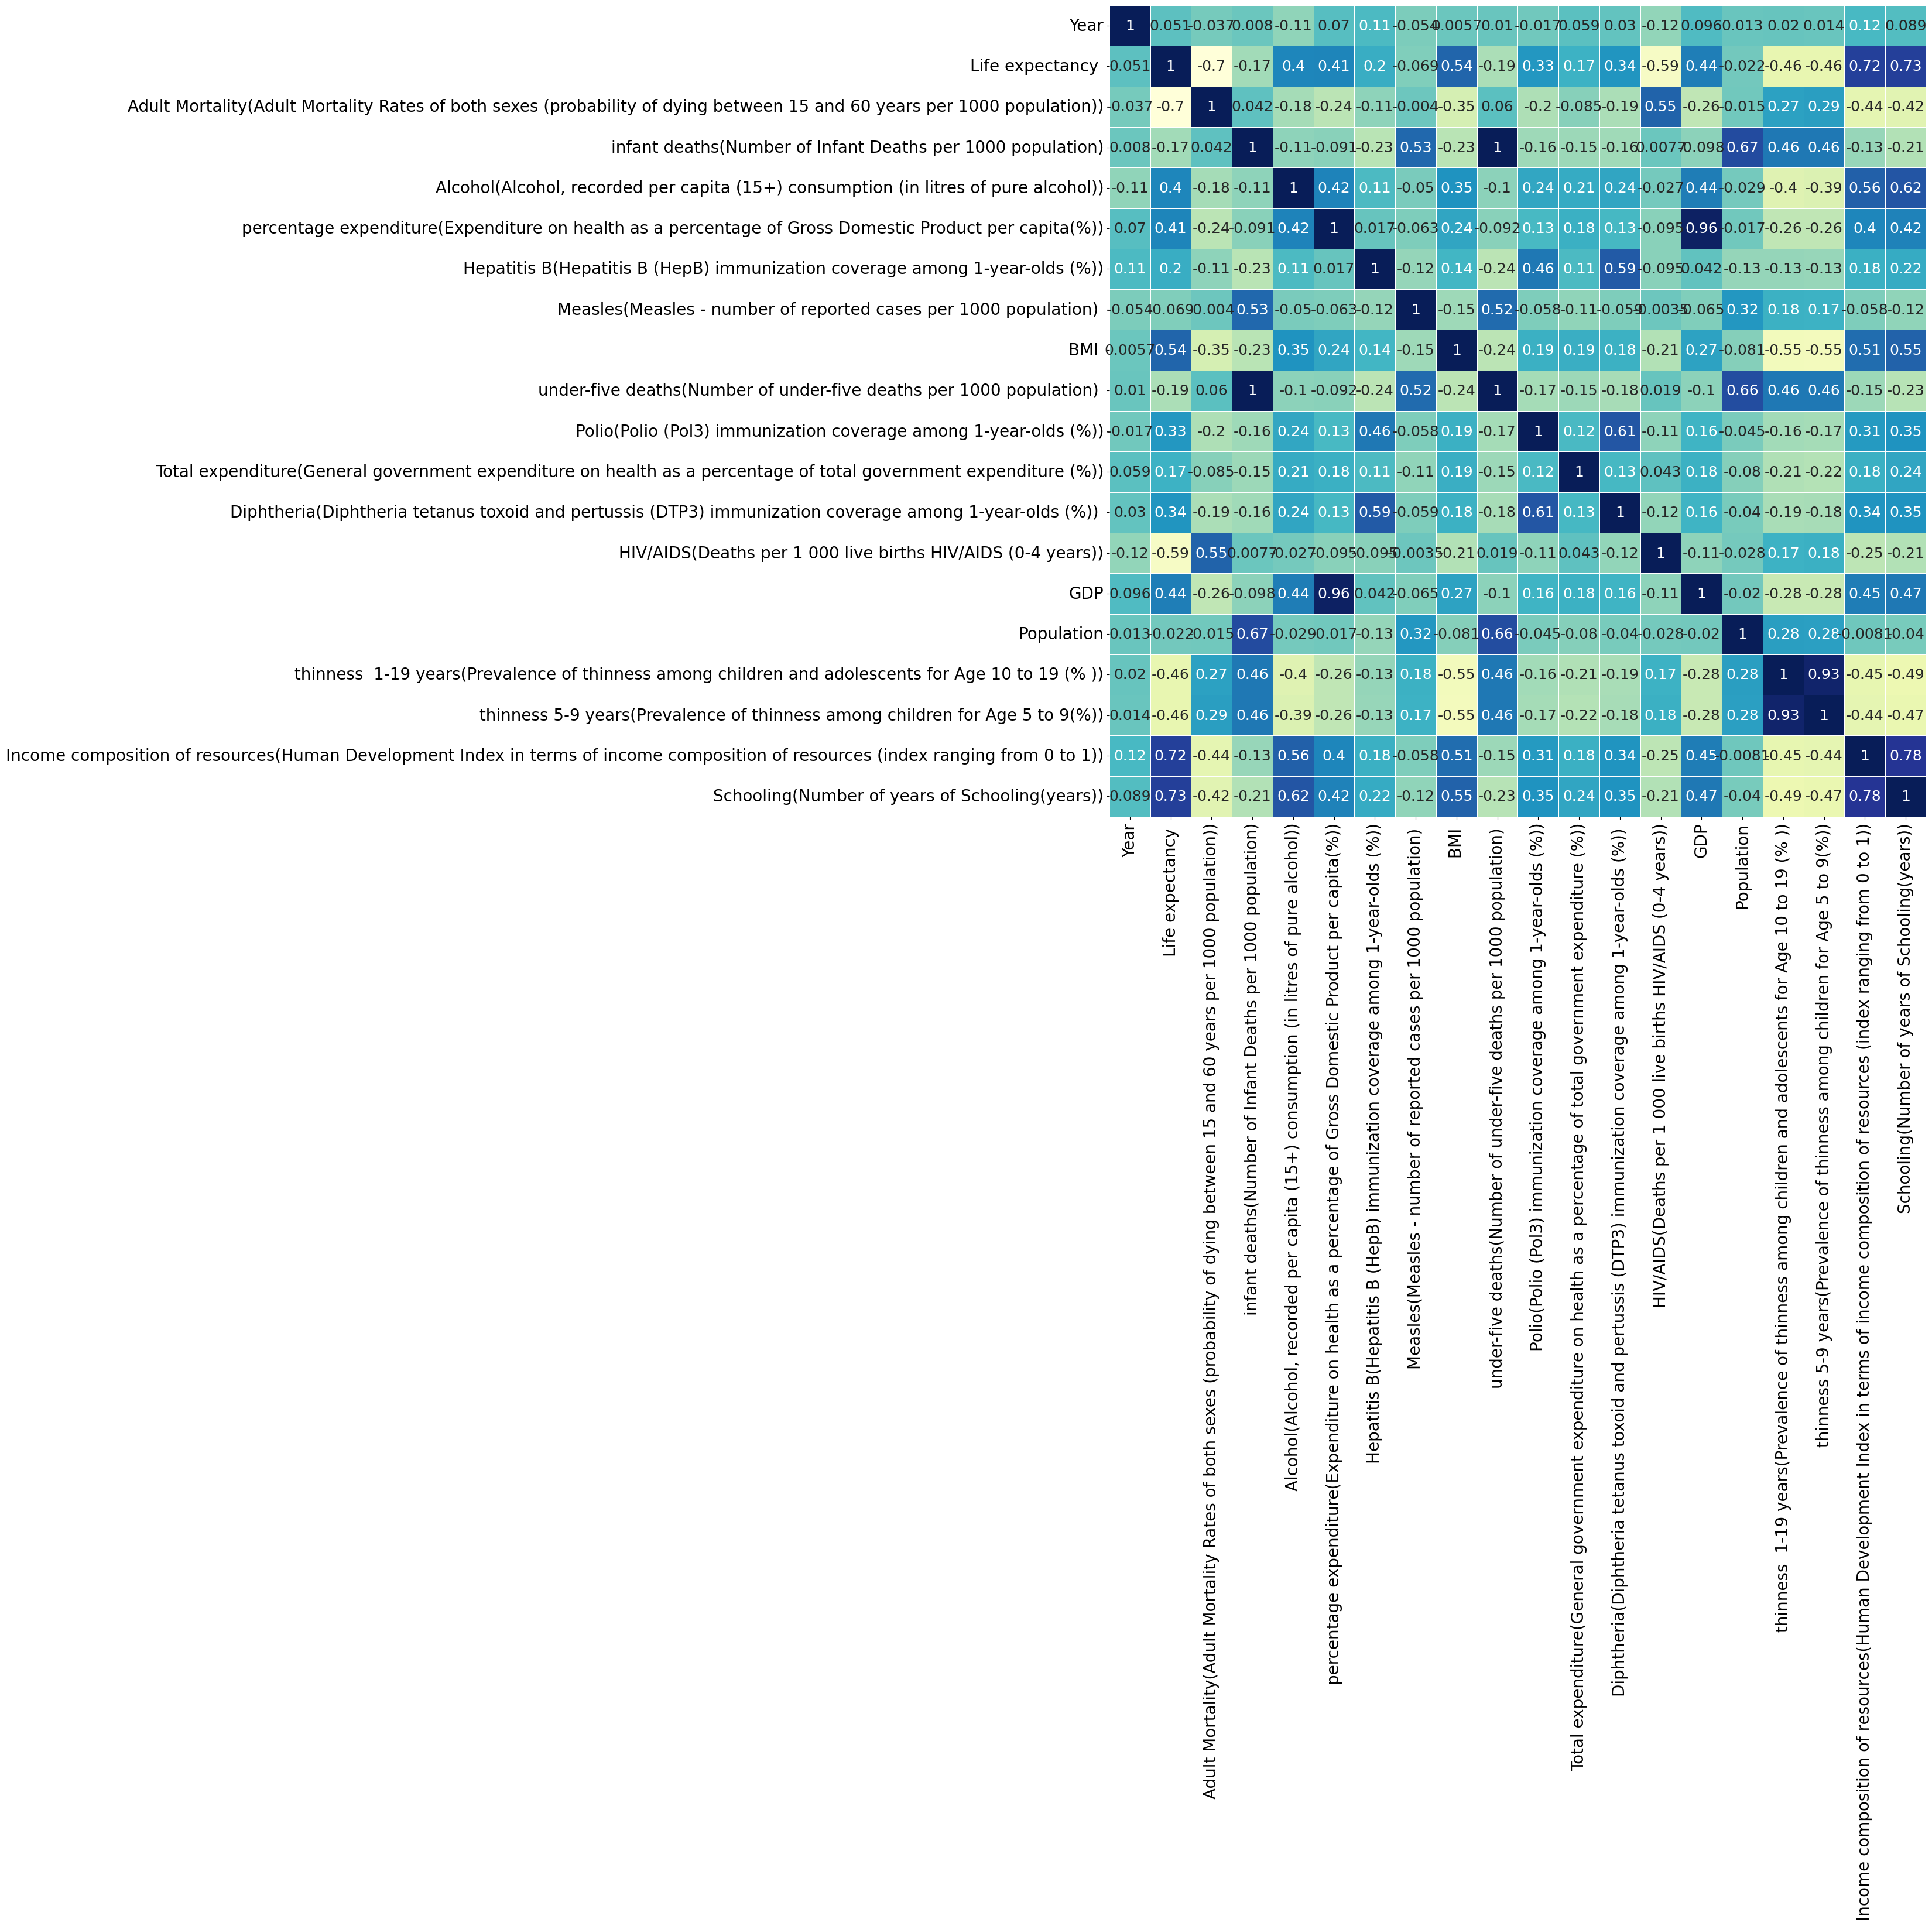

In [6]:
fig=plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),vmax=1,annot=True,linewidths=0.5,cbar=False,cmap='YlGnBu',annot_kws={'fontsize':18})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     1853.
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          6.69e-272
Time:                        14:34:56   Log-Likelihood:                -5303.4
No. Observations:                1649   AIC:                         1.061e+04
Df Residuals:                    1647   BIC:                         1.062e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

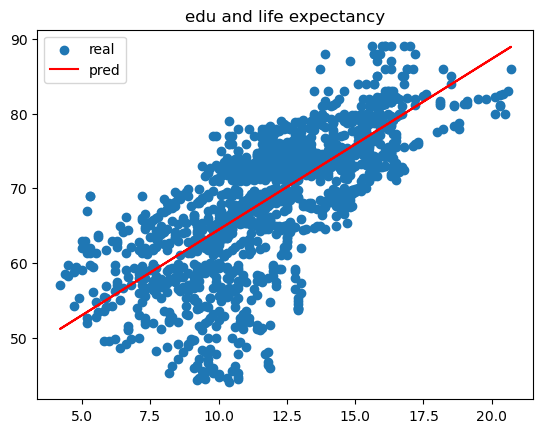

In [37]:
y = data.iloc[:, 3] 
x = data.iloc[:, 21]
x = sm.add_constant(x)
model = sm.OLS(y, x, hasconst=1 ) 
results = model.fit()
predicts = results.predict()
print(results.summary())
x = data.iloc[:, 21] 
plt.scatter(x, y, label='real') 
plt.plot(x, predicts, color = 'red', label='pred')
plt.title('edu and life expectancy')
plt.legend() 
plt.show() 


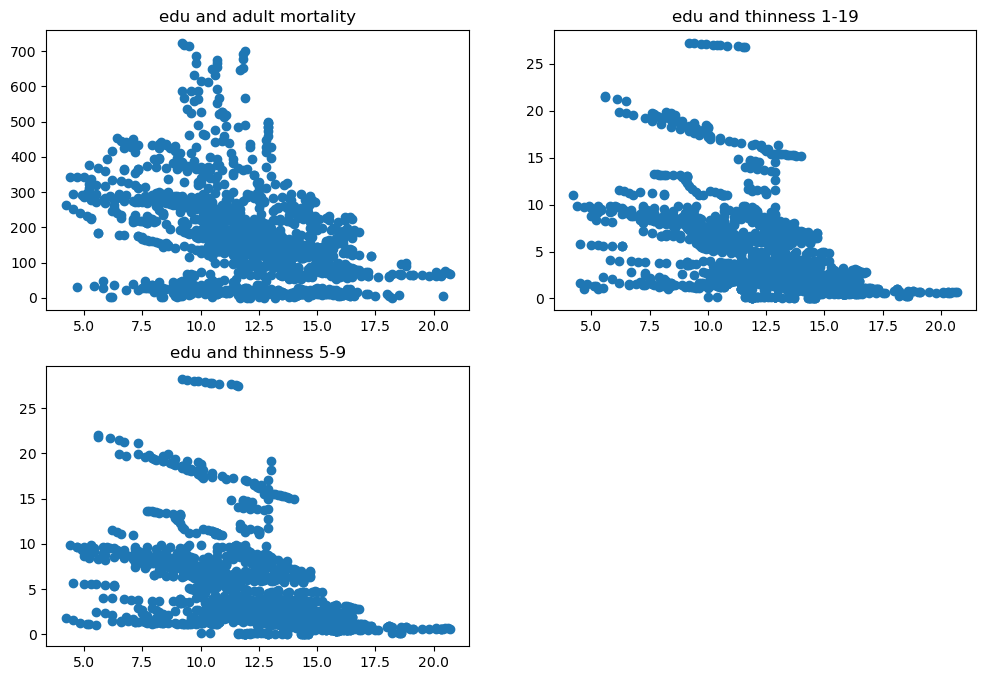

In [36]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.scatter(x=data['Schooling(Number of years of Schooling(years))'],y=data['Adult Mortality(Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population))'])
plt.title('edu and adult mortality')
plt.subplot(2,2,2)
plt.scatter(x=data['Schooling(Number of years of Schooling(years))'],y=data[' thinness  1-19 years(Prevalence of thinness among children and adolescents for Age 10 to 19 (% ))'])
plt.title('edu and thinness 1-19')
plt.subplot(2,2,3)
plt.scatter(x=data['Schooling(Number of years of Schooling(years))'],y=data[' thinness 5-9 years(Prevalence of thinness among children for Age 5 to 9(%))'])
plt.title('edu and thinness 5-9')
plt.show()

In [ ]:
infant deaths(Number of Infant Deaths per 1000 population) 和 under-five deaths(Number of under-five deaths per 1000 population)
相关系数高达1，也就是完全相关。婴儿死亡率和五岁以下死亡率是被包含关系，所以这两个变量属于是完全不独立。

酒精摄入和寿命预期存在0.4的正相关
而教育则高达0.73,教育越好的国家有着更高的预期寿命。但是教育水平和国家经济和公民收入也有较大关系，并非独立因素。稍后可以绘制gdp和教育的关系。!!ZZ

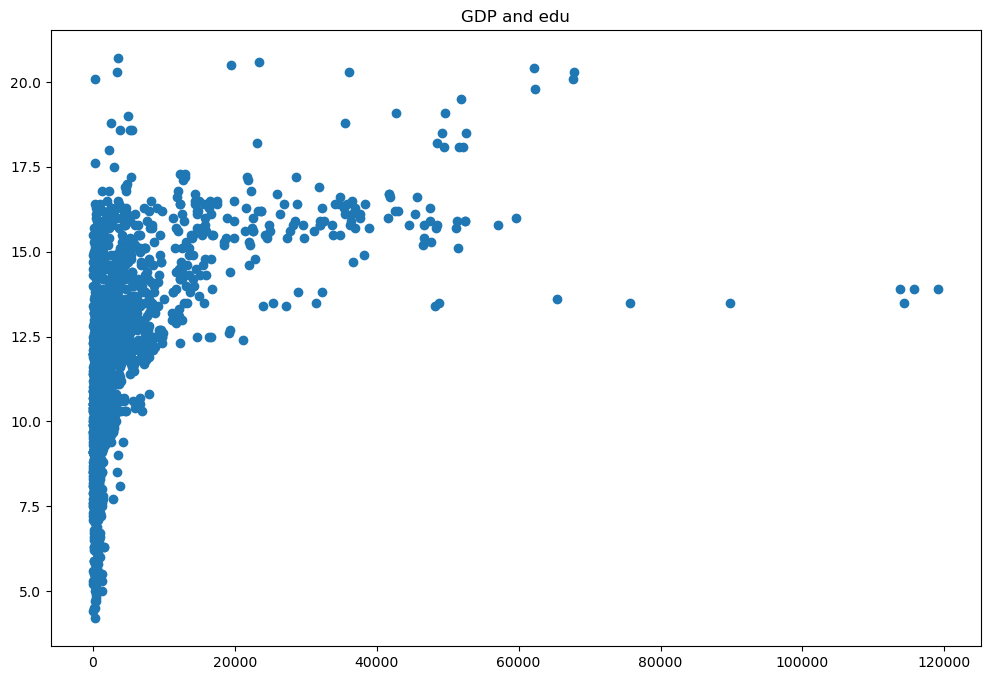

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(x=data['GDP'],y=data['Schooling(Number of years of Schooling(years))'])
plt.title('GDP and edu')
plt.show()

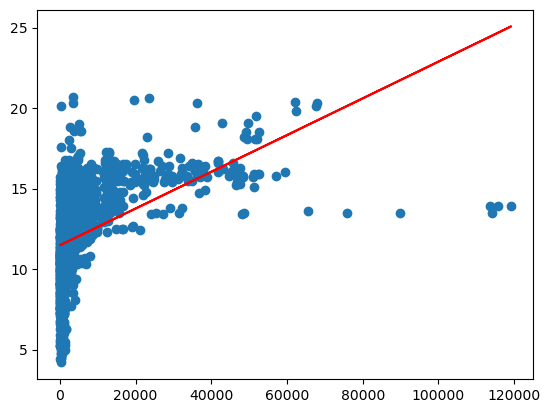

In [89]:
y = data.iloc[:, 21] 
x = data.iloc[:, 16]
x=x[:, np.newaxis]
y=y[:, np.newaxis]
poly_reg = PolynomialFeatures(degree=1)
x_ploy = poly_reg.fit_transform(x)

lin_reg_model = LinearRegression()
lin_reg_model.fit(x_ploy, y)
plt.plot(x, lin_reg_model.predict(x_ploy),'r')
plt.scatter(x=data['GDP'],y=data['Schooling(Number of years of Schooling(years))'])
plt.show()

In [ ]:
明显非线形，尝试多项式，发现表现很不好。x是gdp，明显数据都是堆在左边的，尝试对x取对数让数据分散开.取log以后还算是可以看出有一定的线形关系

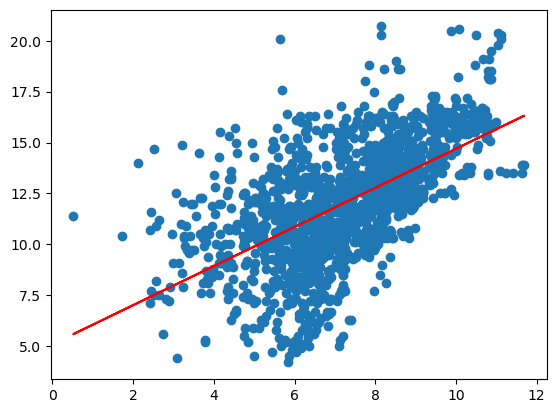

In [90]:
x_log = np.log(x)
plt.scatter(x=x_log,y=data['Schooling(Number of years of Schooling(years))'])
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_log, y)
plt.plot(x_log, lin_reg_model.predict(x_log),'r')
plt.show()

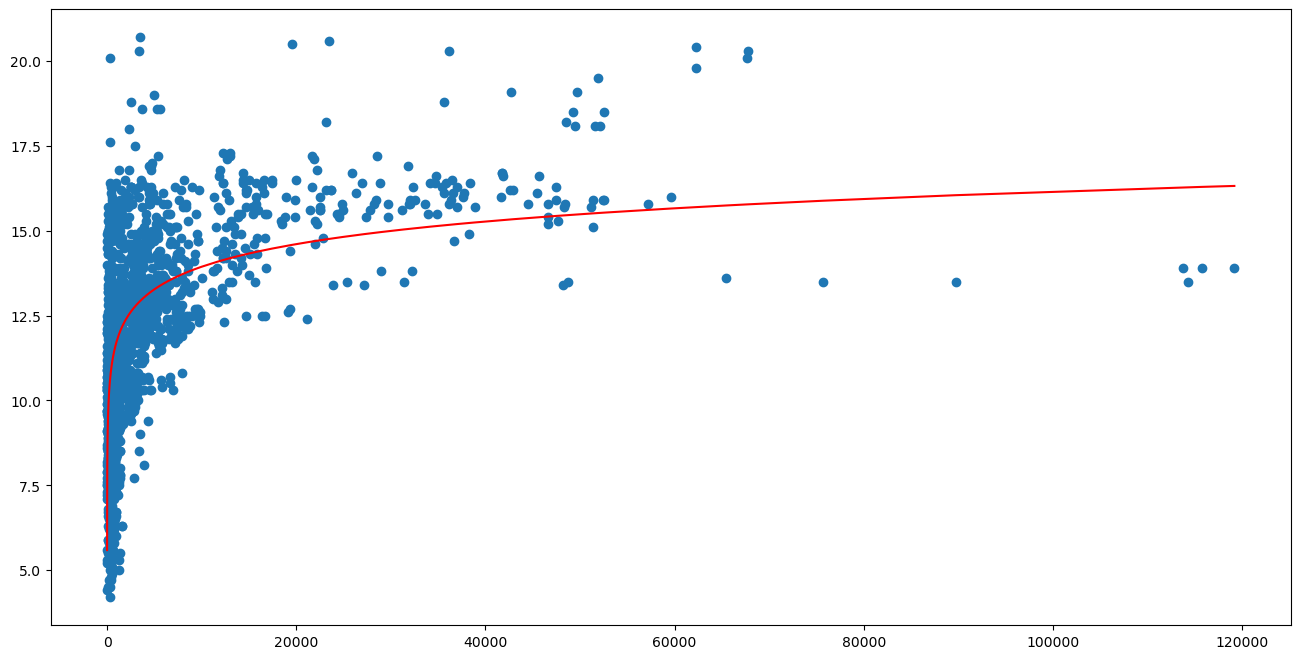

In [92]:
# poly_reg = PolynomialFeatures(degree=1)
# x_ploy = poly_reg.fit_transform(x_log)
plt.figure(figsize=(16,8))
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_log, y)
x_log_ordered=np.sort(x_log, axis =  0)
x_ordered=np.sort(x, axis =  0)
plt.plot(x_ordered, lin_reg_model.predict(x_log_ordered),'r')
plt.scatter(x=x,y=data['Schooling(Number of years of Schooling(years))'])
plt.show()

In [ ]:
基本上是贴合的。可以判断edu和gdp的对数之间存在线性关系

In [ ]:
大部分国家哪怕gdp有较大差异，教育年限也维持在相似水平。
可能是由于人类长久以来的历史制约，比如9年义务教育，绝大部分国家都在此标准之上，在此之后的选择则与各国家国情有关。
尤其是大学本科与研究生的选择，导致了数据在这个区间内进行较大的分化。

In [39]:
def do_cal_min_max(q1, q3):
    min = q1 - 1.5 * (q3 - q1)
    max = q3 + 1.5 * (q3 - q1)
    return min, max


def get_mid_idx(data):
    length = len(data)
    if length % 2 == 0:
        idx1 = length / 2 - 1
        idx2 = idx1 + 1
        idx = np.mean([idx1, idx2])
    else:
        idx = math.ceil(length / 2)
    return idx


def do_cal_quarter(data):
    # 先从小到大排序
    data.sort()
    # 先获取中位数索引和中位数
    idx = get_mid_idx(data)
    q2 = np.median(data)
    # 被中位数索引等分的两部分
    part1 = [v for i, v in enumerate(data) if i < idx]
    part2 = [v for i, v in enumerate(data) if i > idx]
    # 获取下四分位数
    q1 = np.median(part1)
    # 获取上四分位数
    q3 = np.median(part2)
    return q1, q2, q3

temp_data=data['Schooling(Number of years of Schooling(years))'].tolist()
q1, q2, q3 = do_cal_quarter(temp_data)
print(q1, q2, q3)
# 获取最小min、最大值max
min, max = do_cal_min_max(q1, q3)
print(min, max)

10.3 12.3 14.0
4.750000000000002 19.549999999999997


In [ ]:
四等份edu数据，第一个四分点出现在10.3，中位数为12.3，第二个四分点为14
由此可见，在全球的范围内，12年为中位数，即为9年加3年的高中，而第二个三分点则大概为硕士未满。所以75%的数据点集中在10.3到14的范围内


In [ ]:
关于教育与成人死亡率，-0.42。教育与饮酒，正相关的0.62（有点想笑，学历越高越喝酒？可能可以分析，但是需要别的数据了才比较有说服力）

In [ ]:
学历越高越不容易死，可以理解。学历高收入高，有钱花在医疗上，死的少。